# Ch/ChE 164 Project
## Marta Gonzalvo
## March 18$^{\mathrm{th}}$, 2020

In this python notebook I have included both the required analysis and results, as well as the necessary code. The whole notebook takes less than 10 mins to run.

In [1]:
import time
start = time.time()
import numpy as np
import pandas as pd
import scipy.optimize
import matplotlib.pyplot as plt
import ast

## Part 0: Energy

#### a) Occupation of cells contribution:
\begin{align}
    4\,\epsilon \sum_{i=1}^{L}s_i
\end{align}
Each water cell is surrounded by 4 nanotube cells.  If $s_i = 1$, the contribution per nanotube cell will be $\epsilon$, and if $s_i = -1$, the contribution per nanotube cell will be $-\epsilon$. So the penalty per cell of water occupation is of $2\,\epsilon$ per nanotube cell.
#### b) Pairing of spins contribution:
\begin{align}
    - J \sum_{j=0}^{L}s_j s_{j+1}
\end{align} 
So for $L$ cells there are $L+1$ interactions, and we use the same method as above to penalyze different adjacent occupations by $2J$. And taking into account the boundary conditions, where the adjacent cells to the $s_1$ and $s_L$ cells will always be filled with water: $s_0 = s_{i+1} = 1$, we can rewrite that as 
\begin{align}
    - J \sum_{j=1}^{L-1}s_j s_{j+1} - J s_1 - J s_L
\end{align}
So the Hamiltonian has the form of 
\begin{align}
   H\,\{s\} = 4\,\epsilon \sum_{i=1}^{L}s_i - J \sum_{j=1}^{L-1}s_j s_{j+1} - J s_1 - J s_L \\
   \beta \, H\,\{s\} = 4\,\beta \, \epsilon \sum_{i=1}^{L}s_i - \beta \, J \left( \sum_{j=1}^{L-1}s_j s_{j+1} - s_1 - s_L \right )
\end{align}

Code to calculate the hamiltonian energy:

In [2]:
def energy(eps, J, microstates):
    '''Computes the Energy for all microstates (np.array) unitless (E/(kB*T).
    eps, J are unitless constants (divided by kB*T).'''

    coup_wat_nanot = 4*eps*np.sum(microstates, axis=1)

    coup_spins = np.sum(microstates[:,:-1]*microstates[:,1:], axis=1)
    coup_wat = - J*(coup_spins + microstates[:,0] + microstates[:,-1])
    
    return coup_wat_nanot + coup_wat

Function to generate all possible microstates and list of all microstates:

In [3]:
def microstates(L=5, s_vals=[-1,1]):
    '''Generates all possible microstates, 
    given length of system and possible values of s_i'''
    
    return np.unique(np.random.choice(s_vals, size=(L*200,L)), axis=0)

In [4]:
print('There are in total',len(microstates()), 'microstates. The possible microstates are:')
microstates()

There are in total 32 microstates. The possible microstates are:


array([[-1, -1, -1, -1, -1],
       [-1, -1, -1, -1,  1],
       [-1, -1, -1,  1, -1],
       [-1, -1, -1,  1,  1],
       [-1, -1,  1, -1, -1],
       [-1, -1,  1, -1,  1],
       [-1, -1,  1,  1, -1],
       [-1, -1,  1,  1,  1],
       [-1,  1, -1, -1, -1],
       [-1,  1, -1, -1,  1],
       [-1,  1, -1,  1, -1],
       [-1,  1, -1,  1,  1],
       [-1,  1,  1, -1, -1],
       [-1,  1,  1, -1,  1],
       [-1,  1,  1,  1, -1],
       [-1,  1,  1,  1,  1],
       [ 1, -1, -1, -1, -1],
       [ 1, -1, -1, -1,  1],
       [ 1, -1, -1,  1, -1],
       [ 1, -1, -1,  1,  1],
       [ 1, -1,  1, -1, -1],
       [ 1, -1,  1, -1,  1],
       [ 1, -1,  1,  1, -1],
       [ 1, -1,  1,  1,  1],
       [ 1,  1, -1, -1, -1],
       [ 1,  1, -1, -1,  1],
       [ 1,  1, -1,  1, -1],
       [ 1,  1, -1,  1,  1],
       [ 1,  1,  1, -1, -1],
       [ 1,  1,  1, -1,  1],
       [ 1,  1,  1,  1, -1],
       [ 1,  1,  1,  1,  1]])

# Part 1

For the case where the totally filled ($N=L$) and totally empty ($N=0$) microstates are degenerate, $H\,\{1,1,1,1,1\} = H\,\{-1,-1,-1,-1,-1\}$.
\begin{align}
\beta \, H\,\{s\} &= 4\,\beta \, \epsilon \sum_{i=1}^{L}s_i - \beta \, J \left( \sum_{j=1}^{L-1}s_j s_{j+1} - s_1 - s_L \right ) \\  \\
H\,\{1,1,1,1,1\} &= 4\,\epsilon \, 5 - 4 J  - J - J  = 20 \, \epsilon - 6 J \\ \\
H\,\{-1,-1,-1,-1,-1\} &= - 4\,\epsilon \, 5 - 4 J  + J + J = - 20 \, \epsilon - 2 J \\ \\
H\,\{1,1,1,1,1\} &= H\,\{-1,-1,-1,-1,-1\} \\ \\
20 \, \epsilon - 6 J &= - 20 \, \epsilon - 2 J \\
40 \, \epsilon &=  4 J \\
\epsilon &= 0.1 J = \frac{J}{10}
\end{align}
Also, 
\begin{align}
\beta \, \epsilon = \frac{\beta \, J}{10}
\end{align}

<br> <br>


To calculate $P(N)$ and $F(N)$, we need he partition function for the system:

\begin{align}
 Z = \sum_{\{s\}} e^{-\beta H(\{s\})}.
\end{align}
So the probability for  a macrostate is 
\begin{align}
P(N)= \frac{\sum_{\{s\}} e^{-\beta H(\{s\})} \, \, \delta \left( N-\sum^L_{i=1}m_i(s_i) \right) }{\sum_{\{s\}} e^{-\beta H(\{s\})}}, 
\end{align}
where $m_i(s_i) = \frac{1+s_i}{2} = \{0,1\}$, and $\sum_i m_i = N$.

<br>

In this case, the free energy $F(N)$ will be:
\begin{align}
F(N) &= - k_B T\,  ln \, P(N) \\ 
\beta F(N) &= - ln \, P(N)
\end{align}

<br> <br> 
Definitions of the partiton function, $m_i$ function and the probability of all macrostates $\{N\}=\{0, 1, 2, 3, 4, 5\}$:

In [5]:
def partition_fn(eps, J, microstates=microstates()):
    '''Returns partition function for all microstates.'''
    
    x = energy(eps, J, microstates)
    
    return np.sum(np.exp(-x))

###########################################################

def m_i(microstates):
    '''Computes list of m_i, given list of spins.
    s_i=1, m_i=1. s_i=-1, m_i=0'''
    
    m_i = np.array(microstates) == 1

    return m_i.astype(float)

###########################################################

def all_probs(eps, J, L=5, microstates=microstates()):
    '''Calculates all probabilities for all macrostates.
    Returns a list of probabilities for each macrostate.'''
    all_probs = []
    
    exp_energies = np.exp(-energy(eps,J,microstates))
    partition = partition_fn(eps, J, microstates)
    
    div = exp_energies/partition
    m = m_i(microstates)
    
    for N in range(L+1):
        delta = np.sum(m, axis=1) == N 
        
        prob_N = np.sum(div*delta)      
        
        all_probs.append(prob_N)
        
    return all_probs

###########################################################

def free_energy(eps, J, L=5, microstates=microstates()):
    '''Calculates free energy given the probability for a macrostate.'''

    return -np.log(all_probs(eps, J, L, microstates))

Plot of $P(N)$ and $\beta F(N)$.

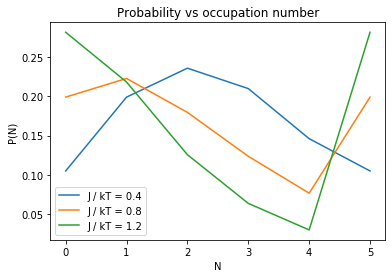

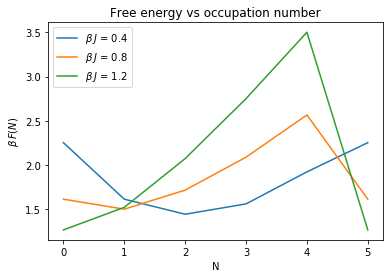

In [6]:
macrostates = [0,1,2,3,4,5]
J_part1 = [0.4, 0.8, 1.2]

#Probability P(N)
for J in J_part1:
    plt.plot(macrostates, all_probs(J/10, J), label='J / kT = {}'.format(J)); 
plt.legend();
plt.xlabel('N');
plt.ylabel('P(N)');
plt.title('Probability vs occupation number')
plt.show()

# Free Energy F(N)
for J in J_part1:
    plt.plot(macrostates, free_energy(J/10, J), label=r'$\beta \, J$ = {}'.format(J));
plt.title('Free energy vs occupation number')
plt.legend();
plt.xlabel('N');
plt.ylabel(r'$\beta \, F(N)$');

In these two plots we can see that for increasing value of $\beta \,J$, there is a shift of most probable states. At low values of $\beta \,J$ like at $\beta \,J=0.4$, there is a moderate free energy well at around $N=2$, favoring the population of intermediatelly filled states.

For increasing values of $\beta \,J$, the trend inverts, where the completely filled and completely empty states are most favorable and most probable. The coupling between water cells gains importance, so that at lower values of $\beta \,J$ we can have mixed regimes with both empty and filled cells. But when $\beta \, J$ increases, the penalty of having an interface, or a filled water cell next to an empty (gas) water cell, is large, and so the system only allows for fully full or empty states, with no interfaces inside of the tube. 

We can relate this to a high surface tension being directly proportional to a high $\beta \,J$. If there is a high surface tension, interfaces will not be favorable and a uniform system will be preferred. However, at low surface tension, there is no penalty to create additional interfaces. In this case, the fluctuations become relevant and by an argument of entropy and degeneracy, the system will be able to explore and prefer an intermediately filled state, as there are more microstates that correspond to intemediately filled macrostates. We can check that this matches the amout of microstates for each macrostate (numbers in the table and in the plot below):

| N | # microstates |
|---|----|
| 0 | 1 |
| 1 | 5 |
| 2 | 10 |
| 3 | 5 |
| 4 | 10 |
| 5 | 1 |

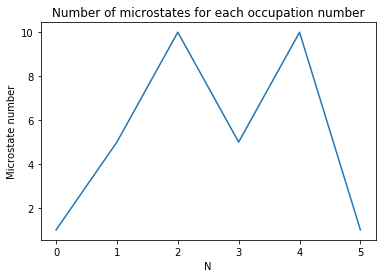

In [7]:
mic_numb = [1,5,10,5,10,1]
plt.plot(macrostates, mic_numb);
plt.xlabel('N');
plt.ylabel('Microstate number');
plt.title('Number of microstates for each occupation number');

## Surface tension

For each interface of area $d^2 = 3.7^2 \, \unicode[serif]{xC5} ^2 $, there is a $2J$ penalty, so the expression relating the two using the surface tension is 
\begin{align}
2 J = \gamma d^2.
\end{align}
Using the value of $\gamma = 72$ mN/m $= 72$ mJ/$\mathrm{m}^2 =$ 0.072 J/$\mathrm{m}^2$, we can get $J$, or $J/k_B T$:
\begin{align}
2 J & = \gamma d^2 \\
2 J & = 0.072 \, \mathrm{J/m}^2 \, (3.7·10^{-10})^2 \, \mathrm{m}^2 \\
J & = 4.928·10^{-21} \, \mathrm{J}\\
\beta  \,J & = 1.198
\end{align}

The value that corresponds to $\beta \, J$ at room temperature is $\beta \, J = 1.2$.

As seen before, this is the value where $\beta \, J$ gains importance with respect to the entropy, and states with no interfaces, completely filled or empty, will be preferred when satisfying the degeneracy condition.

In [8]:
# Calculation
J = ((3.7*(10**(-10)))**2 * 0.072/2)
print('J = ',J, 'J')
print('J\k_BT = ', J/(298*1.380649*(10**(-23))))

J =  4.9284000000000005e-21 J
J\k_BT =  1.197860935948025


# Part 2

In the plots below I show filled, empty and bistable occupancy. The constant values have been found by trial and error, and five values for the empty and filled occupancy are analyzed to show how robust the states are:
- $\beta \, \epsilon < 0.1\, \beta \,J$,  mostly filled
- when $\beta \,\epsilon = 0.1\, \beta \,J = 0.1198$, bistable
- $\beta  \,\epsilon > 0.1\, \beta \,J$, mostly empty

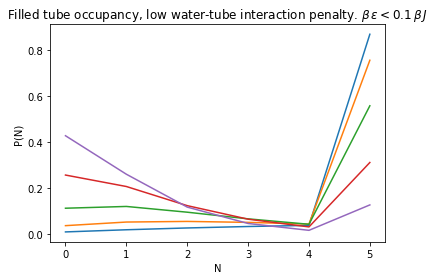

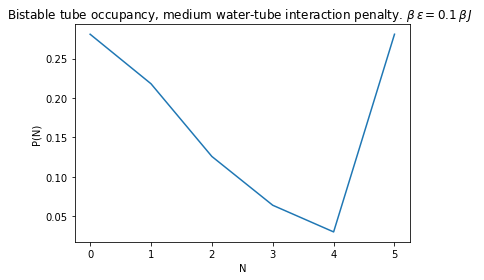

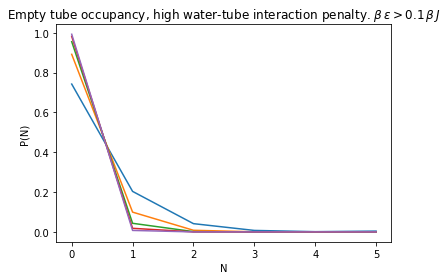

In [9]:
#Defining constant values
J_rt = 1.198
eps_filled = np.linspace(0.01,0.15, 5)
eps_empty = np.linspace(0.25,0.7, 5)

#Filled
for eps in eps_filled:
    plt.plot(macrostates, all_probs(eps, J_rt));
plt.title(r'Filled tube occupancy, low water-tube interaction penalty. $\beta \, \epsilon < 0.1\, \beta \,J$')
plt.xlabel('N');
plt.ylabel('P(N)');
plt.show()

#Bistable
plt.plot(macrostates, all_probs(J_rt/10, J_rt))
plt.title(r'Bistable tube occupancy, medium water-tube interaction penalty. $\beta \, \epsilon = 0.1 \, \beta \, J $  ')
plt.xlabel('N');
plt.ylabel('P(N)');
plt.show()

#Empty
for eps in eps_empty:
    plt.plot(macrostates, all_probs(eps, J_rt));
plt.title(r'Empty tube occupancy, high water-tube interaction penalty. $\beta \, \epsilon > 0.1\, \beta \,J$')
plt.xlabel('N');
plt.ylabel('P(N)');

In these plots above we can see the relationship between the coupling of  water cells and the coupling of water cells with nanotube cells at room temperature. For large values of $\beta \, \epsilon$, the hydrophobicity of the nanotube is the most important effect, and so the most favorable states are the empty ones. When $\beta \, \epsilon = 0.1\, \beta \, J$, the empty and filled states are degenerate, due to a balance of $\beta \, \epsilon$ and $\beta \, J$. And for low values of $\beta \, \epsilon$, the trend inverts as the hydrophobicity of the nanotube is negligible, and so the dominance of $\beta \, J$ leads to a completely filled tube, with no interfaces even with the bulk outside of the tube.  

# Part 3

First, trying to analyze the values of $\beta \, J$ vs $\beta \, \epsilon$ for the different P(N). These functions were written before the current energy and probability functions, which are optimized. However, to generate the plots below these non-vectorized functions are useful. They are only used in this section.

In [10]:
def energy_old(eps, J, spins):
        '''Computes the Energy for a given microstate, unitless (E/(kB*T).
        eps, J are unitless constants (divided by kB*T), spins is a list.'''
        
        coup_wat_nanot = 4*eps*np.sum(spins)
        
        coup_spins = [spins[i]*spins[i+1] for i,_ in enumerate(spins[:-1])]
        coup_wat = - J*(np.sum(coup_spins) + spins[0] + spins[-1])
        
        return coup_wat_nanot + coup_wat
    
def probability_microstate_old(eps, J, spins, N, L=5, microstates=microstates()):    
    '''Computes probability of given microstate, given a macrostate. 
    Microstates is list of lists of spins. 
    Returns a single value'''
    partit_fn =  np.sum(np.exp(-energy_old(eps, J, spins)) for spins in microstates)
    
    if np.sum(m_i(spins)) == N:
        return np.exp(-energy_old(eps, J, spins))/partit_fn
    else: 
        return 0


def probability_macrostate_old(eps, J, N, L=5, microstates=microstates()):    
    '''Computes probability of given macrostate. 
    Microstates is list of lists of spins.
    Returns a single value.'''
    
    return np.sum([probability_microstate_old(eps, J, spins, N, L, microstates) 
                   for spins in microstates])

C:\Users\M\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  app.launch_new_instance()


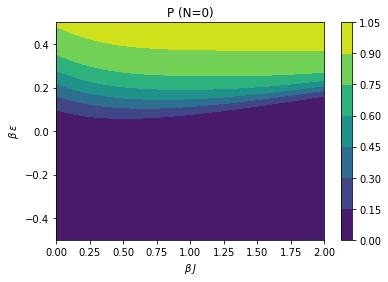

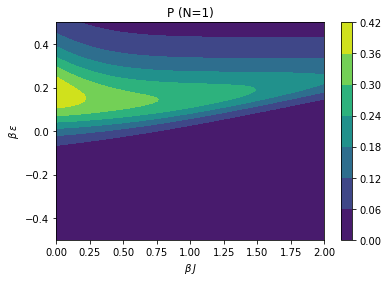

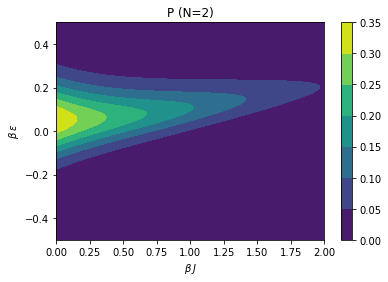

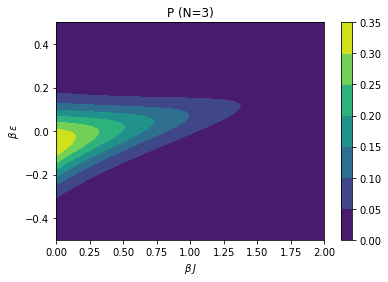

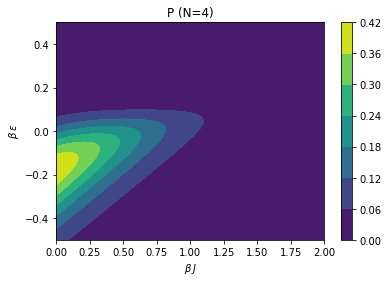

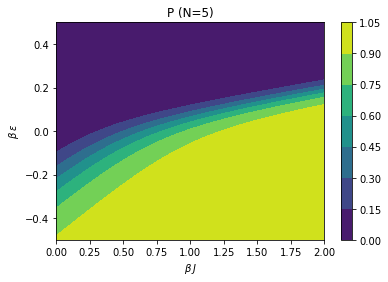

In [11]:
J_part3 = np.linspace(0, 2, 100) 
eps_part3 = np.linspace(-0.5, 0.5, 100)
J_mesh, ep_mesh = np.meshgrid(J_part3, eps_part3)

for N in macrostates:
    P = probability_macrostate_old(ep_mesh, J_mesh, N)
    plt.figure()
    plt.contourf(J_mesh, ep_mesh, P)
    plt.title('P (N={})'.format(N))
    plt.xlabel(r'$\beta \, J$')
    plt.ylabel(r'$\beta \, \epsilon$')
    plt.colorbar()


From these plots above it can be seen that, within the analyzed window (deemed relevant by examining a larger window and not observing any additional interesting features), there are some values for $\beta \epsilon$ and $\beta J$ where there are maximum values of P(N) for each occupancy value, at very low values of $\beta J$ and at values of $\beta \epsilon$ nearing 0, decreasing with increased occupation number. This makes sense, as a decreased $\beta \epsilon$ minimized the hydrophobic penalty of the coupling of the nanotube with a filled water cell, and an increased water cell occupation is favored.

For the extreme cases of emtpy or full occupancy, there are wider regions instead of localized maxima, at distinct values of $\beta \epsilon$ at low $\beta J$, and closer to $\beta \epsilon = 0$ at larger values of $\beta J$. It also seems that at higher values of $\beta J$, $P(N=0)$ and $P(N=5)$ could overlap (as in the bistable state). This follows the trend above of lower values of  $\beta \epsilon$ for increased occupancy. 

However, it is hard to identify relative peaks through this discrete plots, and so the following function finds peaks given P(J, $\epsilon$), and their relative height:   

In [12]:
def find_peaks(eps, J, L=5, microstates=microstates()):
    '''Finds peaks of probability distribution of macrostates for given parameters.'''
    probs = all_probs(eps, J)
    peaks = []
    
    for i, p in enumerate(probs):
        if i == 0:
            if p > probs[i+1]:
                peaks.append(i)
            
        if i > 0 and i < L: 
            if p > probs[i-1] and p > probs[i+1]:
                peaks.append(i)
            
        if i == L:
            if p > probs[i-1]:
                peaks.append(i)
                   
    total_peaks = np.sum(len(peaks))
    
    # More than one peak
    if total_peaks > 1:
        largest_prob = np.argmax([probs[i] for i in peaks])
        return [eps, J, total_peaks, largest_prob] 

    # Only one peak
    return [eps, J, total_peaks, peaks]

Making a phase diagram, plotting the different peak regimes:

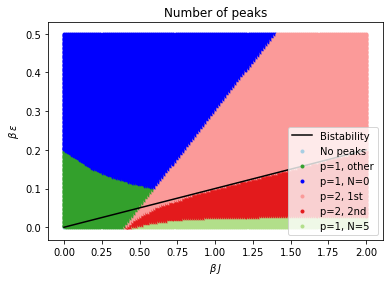

In [13]:
eps_part3 = np.linspace(0, 0.5, 150) 
J_part3 = np.linspace(0, 2, 150)
ep_mesh, J_mesh = np.meshgrid(eps_part3, J_part3)


peak_info_10 = []
for eps, Js in zip(ep_mesh, J_mesh):
    for ep, J in zip(eps,Js):
        peaks = find_peaks(ep,J)
        peak_info_10.append(peaks)
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6']

n_0, n_1, n_2, n_3, n_4, n_5, n_6, n_7, n_8 = 0,0,0,0,0,0,0,0,0

for p in peak_info_10[::]:

    if p[2] == 0:
        if n_0 == 0:
            plt.scatter(p[1], p[0], color=colors[0], marker='.', label='No peaks')
        plt.scatter(p[1], p[0], color=colors[0], marker='.')
        n_0 +=1
        
    # 1 peak
    ## Empty
    if p[2] == 1 and p[3]==[0]:
        if n_1 == 0:
            plt.scatter(p[1], p[0], color='blue', marker='.', label='p=1, N=0')
        plt.scatter(p[1], p[0], color='blue', marker='.')
        n_1 +=1
    ## Full
    if p[2] == 1 and p[3]==[5]:
        if n_2 == 0:
            plt.scatter(p[1], p[0], color=colors[2], marker='.', label='p=1, N=5')
        plt.scatter(p[1], p[0], color=colors[2], marker='.')
        n_2 +=1
    ## Elsewhere
    if p[2] == 1 and p[3]!=[0] and p[3]!=[5]:
        if n_3 == 0:
            plt.scatter(p[1], p[0], color=colors[3], marker='.', label='p=1, other')
        plt.scatter(p[1], p[0], color=colors[3], marker='.')
        n_3 +=1

    #2 peaks
    ## First larger
    if p[2] == 2 and p[3]==[0]: # 1st larger
        if n_4 == 0:
            plt.scatter(p[1], p[0], color=colors[4], marker='.', label='p=2, 1st')
        plt.scatter(p[1], p[0], color=colors[4], marker='.')
        n_4 +=1
    ## Second larger
    if p[2] == 2 and p[3]==[1]: #and 2nd larger:
        if n_5 == 0:
            plt.scatter(p[1], p[0], color=colors[5], marker='.', label='p=2, 2nd')
        plt.scatter(p[1], p[0], color=colors[5], marker='.')
        n_5 +=1
    
    # 3, 4, and 5 peaks
    if p[2] == 3:
        if n_6 == 0:
            plt.scatter(p[1], p[0], color=colors[6], marker='.', label='p=3')
        plt.scatter(p[1], p[0], color=colors[6], marker='.')
        n_6 +=1
    if p[2] == 4:
        if n_7 == 0:
            plt.scatter(p[1], p[0], color=colors[7], marker='.', label='p=4')
        plt.scatter(p[1], p[0], color=colors[7], marker='.')
        n_7 +=1
    if p[2] == 5:
        if n_8 == 0:
            plt.scatter(p[1], p[0], color=colors[8], marker='.', label='p=5')
        plt.scatter(p[1], p[0], color=colors[8], marker='.')
        n_8 +=1

plt.title('Number of peaks')
plt.xlabel(r'$\beta  \,J$')
plt.ylabel(r'$\beta \, \epsilon$')

J_special = [0,2]
eps_special = [0,0.2]
plt.plot(J_special, eps_special, color='black', label='Bistability');

plt.legend();

As it had been hinted in the previous plots, the single maximum peak in probability for occupancy $N=5$ (light green, bottom right) is possible only at very low values of $\beta \epsilon$, where the nanotube is not very hydrophobic so it can be filled with water, and at moderately high values of $\beta J$. As it had also been hinted, the maximum single peak at occupancy $N=0$ (blue, top left) occurs when hydrophobicity becomes of importance at higher values of $\beta \epsilon$. 
It also occurs at low values of $\beta J$, as at higher values of $\beta J$, the energetics of coupling between cells with different water occupancy become important and the creation of interfaces with the boundary bulk cells becomes less favorable. 

As we increase $\beta J$ from a low value of $\beta J$, we will reach the salmon area, where the first peak of the two peaks in the probability distribution is higher. This means low occupancy is preferred, but ther is also a local maximum at high occupancy. If we then lower the value of $\beta \epsilon$, we will reach the red area, where the second peak is highest, so now high occupancy is preferred, but low occupancy is still localy stable. As above explained, the nanotube becomes less hydrophobic and so more water can come in. However, the nanotube is still hydrophobic enough that low occupancy can also exist. In between the two two-peak states there is the bistability line, in black. The boundary, as explained above, is a balance between hydrophobicity ($\beta \epsilon$), favoring low occupancy at high values, and surface tension ($\beta J$), favoring full occupancy at high values.

And lastly, the green area at low values of $\beta J$ and $\beta \epsilon$ in the bottom left occurs when the thermal fluctuations gain importance. In this case, neither $\beta J$ and $\beta \epsilon$ are high enough to dominate the behavior of the system. All the microscopic spin states become degenerate energetically, and so entropy gains importance and the most probable macrostates will be those with a higher number of microstates. As seen above, this corresponds to the intermediatelly filled states, and so those will be the peak in probability.

# Part 4

In this case, we can only have two cases: 0 or 2 interfaces, as an odd number of interfaces in a system with our symmetric boundary conditions is not possible. 

- For 0 interfaces, all $s_i$ = 1, and so the hamiltonian $ H\,\{s\} = 4\,\epsilon \sum_{i=1}^{L}s_i - J \sum_{j=1}^{L-1}s_j s_{j+1} - J s_1 - J s_L$ becomes 

\begin{align}
H \, (\{s_i = 1 \,\, \forall i \}) = 4 \, \epsilon L - J(L-1)
\end{align}


- For a system with up to two grain boundaries, we can assign k and l as the index where the grain boundaries appear. There are 6 possible interfaces, starting from the bulk-first cell (interface 0) until the last interface, cell L-bulk (interface L=5 in our case). For $k>l$, the number of unoccupied cells is $k-l$, and the number of occupied cells is $L-k-l$. The ranges for the indices $l$ and $k$ are $l:0 \sim L-1=4$, and $k:l+1 \sim L=5$. In this case, we can write the hamiltonian as: 

\begin{align}
H &= [L-(k-l)-(k-l)(-1)] 4 \, \epsilon + (L-3)J \\
H &= [L-2(k-l)] 4 \, \epsilon + (L-3)J
\end{align}
   
<br> <br>

A modified partition function under the constraint will be
\begin{align}
Z^* &= \sum^2_{p=o}\sum_{\{s\}_p} e^{-\beta H(\{s\})} = \sum_{\{s\}_0} e^{-\beta H} + \sum_{\{s\}_2} e^{-\beta H} = e^{-\beta [4\epsilon L-J(L+1)]} + \sum_{\{s\}_2} e^{-\beta H}, \\
\end{align}

where $p$ is the number of interfaces and the last term is the following, with $q$ as the number of unoccupied cells:

\begin{align}
\sum_{\{s\}_2} e^{-\beta H} &= \sum_{q=1}^L \sum_{\{ s\}_2} e^{-\beta[4 \epsilon(L-2q) + (L-3)J]} \, \delta(q -(k-l))  \\
 &= \sum_{q=1}^L (L-q+1) e^{-\beta \, [4 \epsilon(L-2q) + J(L-3)]} \\
 &=  e^{-\beta [4 \epsilon L + J(L-3)]} \sum_{q=1}^L (L-q+1) \, e^{8 \, \beta 8 \epsilon q}
\end{align}

If we call the summation S,

\begin{align}
S &= \sum_{q=1}^L (L-q+1) \, e^{8 \, \beta \epsilon q} \\
e^{8 \, \beta \epsilon } S &= \sum_{q=1}^L (L-q+1) \, e^{8 \, \beta \epsilon (q+1)} = \sum_{q=2}^{L+1} (L-(q-1)+1) \, e^{8 \, \beta \epsilon (q+1)} &= \sum_{q=2}^{L+1} (L-q+2) \, e^{8 \, \beta \epsilon (q+1)} \\
S - e^{8 \, \beta \epsilon} S  &= (1-e^{8 \, \beta \epsilon})S = - \sum_{q=2}^Le^{8 \, \beta \epsilon q} + L e^{8 \, \beta \epsilon} - e^{8 \, \beta \epsilon (L+1)} \\
S &= \frac{- \sum_{q=2}^Le^{8 \, \beta \epsilon q} + L e^{8 \, \beta \epsilon} - e^{8 \, \beta \epsilon (L+1)} }{1-e^{8 \, \beta \epsilon} }
\end{align}

If we call this second summation s,

\begin{align}
s &= \sum_{q=2}^Le^{8 \, \beta \epsilon q} = e^{8 \, \beta \epsilon 2} + e^{8 \, \beta \epsilon 3} + ... + e^{8 \, \beta \epsilon L} \\
e^{8 \, \beta \epsilon } s &= e^{8 \, \beta \epsilon 3} + ... + e^{8 \, \beta \epsilon (L+1)} \\
(1-e^{8 \, \beta \epsilon }) s &= e^{8 \, \beta \epsilon 2} - e^{8 \, \beta \epsilon (L+1)} \\
s &= \frac{e^{8 \, \beta \epsilon 2} - e^{8 \, \beta \epsilon (L+1)}}{1-e^{8 \, \beta \epsilon }} 
\end{align}

Then the initial summation S is
\begin{align}
S &=  \frac{-e^{8 \, \beta \epsilon 2} + e^{8 \, \beta \epsilon (L+1)}}{(1-e^{8 \, \beta \epsilon})^2} + \frac{L e^{8 \, \beta \epsilon}}{1-e^{8 \, \beta \epsilon}}  - \frac{e^{8 \, \beta \epsilon (L+1)}}{1-e^{8 \, \beta \epsilon}} \\
 S &= \frac{e^{8 \beta \epsilon}(-1 -L + e^{8 \beta \epsilon L}) +L}{e^{-8 \beta \epsilon} -1}
\end{align}

So overall, $Z^*$ in the closed form is:
\begin{align}
Z^* =& e^{-\beta [4\epsilon L-J(L+1)]} +  e^{-\beta [4 \epsilon L + J(L-3)]} \left[ \frac{ L +e^{8 \beta \epsilon}( e^{8 \beta \epsilon L} -1 -L)}{e^{-8 \beta \epsilon} -1} \right]
\end{align}


Then the free energy will be:

\begin{align}
F(N) &= - k_B T \, ln \frac{\sum_{\{s\}} e^{-\beta H(\{s\})} \, \, \delta \left( N-\sum^L_{i=1}m_i(s_i) \right) \, \, \delta \left\{ q-(k-l) \right\} }{ Z^* } \\ \\ \\
F(N) &= -k_B T \, ln \, \frac{\sum_{\{s\}} e^{-\beta H(\{s\})} \, \, \delta \left( N-\sum^L_{i=1}m_i(s_i) \right) \, \, \delta \left\{ q-(k-l) \right\}}{e^{-\beta [4\epsilon L-J(L+1)]} +  e^{-\beta [4 \epsilon L + J(L-3)]} \left[ \frac{ L +e^{8 \beta \epsilon}( e^{8 \beta \epsilon L} -1 -L)}{e^{-8 \beta \epsilon} -1} \right] } \\ \\ 
\beta F(N) &= - ln \, \frac{\sum_{\{s\}} e^{-\beta H(\{s\})} \, \, \delta \left( N-\sum^L_{i=1}m_i(s_i) \right) \, \, \delta \left\{ q-(k-l) \right\}} {  e^{-\beta [4\epsilon L-J(L+1)]} +  e^{-\beta [4 \epsilon L + J(L-3)]} \left[ \frac{ L +e^{8 \beta \epsilon}( e^{8 \beta \epsilon L} -1 -L)}{e^{-8 \beta \epsilon} -1} \right] } 
\end{align}


As a reminder, the exact answer equations are the following:
\begin{align}
 Z &= \sum_{\{s\}} e^{-\beta H(\{s\})} \\
P(N)&= \frac{\sum_{\{s\}} e^{-\beta H(\{s\})} \, \, \delta \left( N-\sum^L_{i=1}m_i(s_i) \right) }{\sum_{\{s\}} e^{-\beta H(\{s\})}} \\
F(N) &= - k_B T\,  ln \, P(N) \\ 
\beta F(N) &= - ln \, P(N)
\end{align}


In [ ]:
def approx_partition_fn(eps, J, L=5):
    '''Returns partition function for microstates with 0 or 2 interfaces.'''
    
    zero = np.exp(-4*eps*L+J*(L+1))
    two = np.exp(-4*eps*L-J*(L-3))*(L + np.exp(8*eps)*(np.exp(8*eps*L)-1-L))/(np.exp(-8*eps)-1)
    
    return zero + two

def interfaces(L=5, microstates=microstates()):
    '''Calculates number of interfaces for each microstate.'''
    m = m_i(microstates)
    
    ext_0 = m[:, 0]==0
    ext_L = m[:, L-1]==0
    interior = np.sum([m[:,i]!=m[:,i+1] for i in range(L-1)], axis=0)   
    
    return ext_0+interior+ext_L

def approx_probs(eps, J, L=5, microstates=microstates()):
    '''Calculates probabilities for macrostates with 0 or 2 interfaces.
    Returns a list of probabilities for each macrostate.'''
    all_probs = []
    
    exp_energies = np.exp(-energy(eps,J,microstates))
    partition = approx_partition_fn(eps, J, L)    
    div = exp_energies/partition
    
    m = m_i(microstates)
    
    delta2 = interfaces(L, microstates) <= 2
    
    for N in range(L+1):
        delta = np.sum(m, axis=1) == N
        
        prob_N = np.sum(div*delta*delta2)
        all_probs.append(prob_N)
        
    return all_probs/np.sum(all_probs)

# address normalization
# IT CHANGES?!

In [ ]:
np.sum(all_probs(J/10, J))

In [ ]:
normaliz = np.sum(approx_probs(J/10, J))
normaliz

In [ ]:
color_exact = ['#e6550d','#3182bd','#31a354']
color_approx = ['#fdae6b','#9ecae1','#a1d99b']

#blues ['#deebf7','#9ecae1','#3182bd']

for i, J in enumerate(J_part1):
    plt.plot(macrostates, free_energy(J/10, J), color=color_exact[i], linewidth=2, 
             label= r'$\beta \, J $= {}, exact'.format(J));
    plt.plot(macrostates, -np.log(approx_probs(J/10, J)), color=color_approx[i], linewidth=2, 
             label= r'$\beta  \,J$ = {}, approx'.format(J))
plt.legend();
plt.xlabel('N');
plt.ylabel(r'$\beta F(N)$');

In the plot above, the darker shades correspond to the exact solutions, and the ligher shades correspond to the approximate solution. In green, we can see that at room temperature values of $\beta J$, the approximation holds very well. However, with lower values of $\beta J$, the approximation starts to vary a lot from the exact solution (blue and orange). This happens at higher temperatures, or low values of $J$. In both cases, entropy starts to play a bigger role, and so the assumption that only two or less interfaces will exist is no longer valid. 
At high temperatures, the method breaks down because entropy starts to take a bigger role and so more states are available, overcoming the energetics of the system. More interfaces will be created. And at low values of $J$, the same phenomenon will happen due to a decrease in the energetic penalty of coupling different spins.

# Part 5

The exact hamiltonian is 
\begin{align}
   \beta \, H\,\{s\} = 4\,\beta \, \epsilon \sum_{i=1}^{L}s_i - \beta \, J \left( \sum_{j=1}^{L-1}s_j s_{j+1} - s_1 - s_L \right ).
\end{align}


By using a mean field treatment, where $s_i = \{+1,-1\}$, and $H_i = -h_i s_i$, we can approximate each spin as:

\begin{align}
<s_i> = \frac{\sum_{s_i} s_i e^{\beta H_i(s_i)}} {\sum_{s_i} e^{\beta H_i(s_i)}} = \frac{e^{\beta h_i} - e^{-\beta h_i}}{e^{\beta h_i} + e^{-\beta h_i}} = tahn (\beta h_i)
\end{align}

So for the uncoupled case, the hamiltonian for the i$\mathrm{^{th}}$ cell in mean field will be 
\begin{align}
\beta \, h_{i,mf} = -4\beta \, \epsilon + \beta \, J(<s_{i-1}>_{mf} + <s_{i+1}>_{mf})
\end{align}

So for each spin, $<s_{i}>_{mf}$ is:
\begin{align}
<s_{1}>_{mf} &= \mathrm{tanh}\,\left[-4\beta \, \epsilon+\beta \, J (1+<s_{2}>_{mf})\right] \\
<s_{2}>_{mf} &= \mathrm{tanh}\,\left[-4\beta \, \epsilon+\beta \, J (<s_{1}>_{mf}+<s_{3}>_{mf})\right] \\
... \\
<s_{L=5}>_{mf} &= \mathrm{tanh}\,\left[-4\beta \, \epsilon+\beta \, J (<s_{4}>_{mf}+1)\right]
\end{align}

We need to satisfy all of the equations at once. So we can use an iterative approach to solve them. Here I have used the function scipy.optimize.fsolve to do so.

In [18]:
def spin_solve(s, *args):
    eps, J = args
    s1, s2, s3, s4, s5 = s
    
    x1 = np.tanh(-4*eps + J*(1+s2)) - s1
    x2 = np.tanh(-4*eps+J*(s1+s3)) - s2
    x3 = np.tanh(-4*eps+J*(s2+s4)) - s3
    x4 = np.tanh(-4*eps+J*(s3+s5)) - s4
    x5 = np.tanh(-4*eps+J*(s4+1)) - s5
    
    x = np.array([x1, x2, x3, x4, x5])
    
    return x

In [19]:
J = 1.198
eps = J/10

x, a, b, c = scipy.optimize.fsolve(spin_solve, np.array([1,1,1,1,1]), (eps, J), full_output=True)

In [20]:
a['nfev']

12

In [21]:
e, f, g, h = scipy.optimize.fsolve(spin_solve, np.array([-1,-1,-1,-1,-1]), (eps, J), full_output=True)

In [22]:
f['nfev']

12

reproduce plots P(N)
Compare with each other, exact part 2


importance fluc's water occupancy?
# explain well
mean field good at high epsilon. not good at low epsilons: high fluctuations

# Part 6

To model the dynamics of the system obeying detailed balance, I will use the Monte Carlo-Metropolis Algorithm, as explained in class. It obeys detailed balance. I will use the parameters from part 1, in the three possible regimes seen in part 2.

Functions to run the dynamics: acceptance criteria and actual dynamics.

In [23]:
def acceptance(eps,J,spins, L=5):
    '''Generates a new microstate and determines whether it should 
    be accepted or not. Spins is a list of spins.'''
        
    spins_test = np.copy(spins)
    to_change = int(np.random.randint(low=0,high=L,size=1))
    spins_test[:,to_change] = spins[:,to_change]*-1

    energy_start = energy(eps, J, spins)
    energy_test = energy(eps, J, spins_test)
    
    # Accept
    if energy_test <= energy_start:
        return spins_test  
    
    if np.random.random() <= np.exp(-energy_test):
        return spins_test
    
    # Reject
    return spins

#########################################################################

def dynamics(eps, J, init_spins, steps, L=5):
    '''Runs dynamics of the system.'''
    
    spins_dyn = np.zeros((steps, L))
    spins = init_spins
    
    for step in range(steps):
        spins = acceptance(eps, J, spins)
        spins_dyn[step] = spins
        
    return spins_dyn

Functions for the analysis of the dynamics of a system.
# is this running average??

In [24]:
def avg_prob(dyns, eps, J, L=5):
    '''Calculates the probability
    given the dynamics of a system. 
    Dyns is a list of microstates.'''
    avg_prob = np.zeros((len(dyns), L+1))
    
    for i, _ in enumerate(dyns):
        avg_prob[i] = all_probs(eps, J, L, dyns[:i+1])
        
    return avg_prob

#########################################################################

def info_dyn(dyns, eps, J, L=5):
    '''Calculates running average, occupation number 
    and number of interfaces given the dynamics of a system. Dyns 
    is a list of microstates.'''
    clean_info = m_i(dyns)
        
    # Occupation number
    occup = np.zeros(len(dyns))
    for i, c in enumerate(clean_info):
        occup[i] = np.sum(c)
        
    # Number of interfaces
    interf = np.zeros(len(dyns))
    for i, c in enumerate(clean_info):
        ext_0 = c[0]==0
        ext_L = c[L-1]==0
        
        interior = 0
        for m in range(len(c)-1):
            interior += c[m]!=c[m+1]
            
        interf[i] = ext_0+interior+ext_L
    
    return occup, interf

#########################################################################

def avg_occ(info_dyn):
    '''Calculates running average of the occupation and interface
    number.'''
    
    avg_info = np.zeros_like(info_dyn)
    for i in range(len(info_dyn[0])):
        avg_info[0][i] = np.mean(info_dyn[0][:i])
        avg_info[1][i] = np.mean(info_dyn[1][:i])
        
    return avg_info

Calculating for the three different cases.

In [ ]:
starJ_rt = 1.198
init_spins = np.array([[-1,-1,-1,-1,-1]])
steps = 300000

# "Filled": epsilon < J/10
eps_filled = 0.03
dyn_filled = dynamics(eps_filled, J_rt, init_spins, steps)
prob_filled = avg_prob(dyn_filled, eps_filled, J_rt) # 23 s 10,000
info_filled = info_dyn(dyn_filled, eps_filled, J_rt)

# "Bistable": epsilon = J/10
eps_bist = J_rt/10
dyn_bist = dynamics(eps_bist, J_rt, init_spins, steps)
prob_bist = avg_prob(dyn_bist, eps_bist, J_rt) # 23 s 10,000
info_bist = info_dyn(dyn_bist, eps_bist, J_rt)

# "Empty": epsilon > J/10
eps_empty = 0.45
dyn_empty = dynamics(eps_empty, J_rt, init_spins, steps)
prob_empty = avg_prob(dyn_empty, eps_empty, J_rt) # 23 s 10,000
info_empty = info_dyn(dyn_empty, eps_empty, J_rt)

Plotting the results. The code is the same for the three different states.

In [ ]:
##################################
# "FILLED": epsilon < J/10 
##################################

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4));
times = np.linspace(0,len(prob_filled)/10, 10)

for t in times:
    ax1.plot(macrostates, prob_filled[int(t)-1], label='{}'.format(int(t)));
ax1.plot(macrostates, all_probs(eps_filled, J_rt), color='black',  linestyle='--', label='Part 1 data');
ax1.set_title('P(N), N=5')
ax1.legend();
ax1.set_xlabel('N')
ax1.set_ylabel('Average P(N)')

# OCCUPATION NUMBER
ax2.set_title('Occupation number, N=5')
ax2.scatter(range(len(info_filled[0])), info_filled[0][:], alpha=0.02);
ax2.set_xlabel('Number of steps')
ax2.set_ylabel('Number')

# NUMBER OF INTERFACES
ax3.scatter(range(len(info_filled[1])), info_filled[1][:], alpha=0.02);
ax3.set_ylim([-0.2,5])
ax3.set_title('Number of interfaces, N=5')
ax3.set_xlabel('Number of steps')
ax3.set_ylabel('Number')

fig.suptitle(r'$\beta \epsilon < 0.1 \beta J$, "Filled"');

###################################################################################################

##################################
# "BISTABLE": epsilon = J/10 
##################################

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4));
times = np.linspace(0,len(prob_bist)/1, 10)

#ax1.plot([macrostates]*len(prob_bist), prob_bist[:], label='{}'.format(t), alpha='0.1');
for t in times:
    ax1.plot(macrostates, prob_bist[int(t)-1], label='{}'.format(int(t)));

ax1.plot(macrostates, all_probs(eps_bist, J_rt), color='black',  linestyle= '--', label='Part 1 data');
ax1.set_title('P(N), bistable')
ax1.legend();
ax1.set_xlabel('N')
ax1.set_ylabel('Average P(N)')

# OCCUPATION NUMBER
ax2.set_title('Occupation number, bistable')
ax2.scatter(range(len(info_bist[0]))[::], info_bist[0][::], alpha=0.02);
ax2.set_xlabel('Number of steps')
ax2.set_ylabel('Number')

# NUMBER OF INTERFACES
ax3.scatter(range(len(info_bist[1]))[::], info_bist[1][::], alpha=0.02);
ax3.set_title('Number of interfaces, bistable')
ax3.set_ylim([-0.2,5])
ax3.set_xlabel('Number of steps')
ax3.set_ylabel('Number')

fig.suptitle(r'$\beta \epsilon = 0.1 \beta J$, "Bistable"');

###################################################################################################

##################################
# "EMPTY": epsilon > J/10 
##################################
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4));
times = np.linspace(0,len(prob_empty)/100, 10)

for t in times:
    ax1.plot(macrostates, prob_empty[int(t)-1], label='{}'.format(int(t)));
ax1.plot(macrostates, all_probs(eps_empty, J_rt), color='black',  linestyle= '--', label='Part 1 data');
ax1.set_title('P(N), N=0')
ax1.legend();
ax1.set_xlabel('N')
ax1.set_ylabel('Average P(N)')

# OCCUPATION NUMBER
ax2.scatter(range(len(info_empty[0])), info_empty[0][:], alpha=0.02);
ax2.set_title('Occupation number, N=0')
ax2.set_xlabel('Number of steps')
ax2.set_ylabel('Average number')

# NUMBER OF INTERFACES
ax3.scatter(range(len(info_empty[1])), info_empty[1][:], alpha=0.02);
ax3.set_title('Number of interfaces, N=0')
ax3.set_ylim([-0.2,5])
ax3.set_xlabel('Number of steps')
ax3.set_ylabel('Number')

fig.suptitle(r'''$\beta \epsilon > 0.1 \beta J$, "Empty"''');

In the panel above I have plotted all of the data for the three possible parameter ratios: $\beta \epsilon < 0.1 \beta J$ (top row), $\beta \epsilon = 0.1 \beta J$ (middle row) and $\beta \epsilon > 0.1 \beta J$ (bottom row). 

In the first column I have plotted the probability distribution at different number of steps (see legend). We can see that the different regimes converge to the final exact probability at different number of steps: first XXXXXX, then XXXX and finally XXXX. 
# FINISH


In the middle column I have plotted the occupation number. The most intense values correspond to the number that most of the states in each step of the dynamics has. We can see that the most intense occupation number in the "empty" or  $\beta \epsilon > 0.1 \beta J$ case is around 2, and that in contrast that number  is closer to 4 or 3 in the opposite "filled" case,  $\beta \epsilon > 0.1 \beta J$. For the intermediate "bistable" case, the occupation seems pretty uniform across N=1-4. 
If we look at the number of possible interfaces in the third column, we can see that the most common number of interfaces for the 3 possible regimes is 2, and that 4 interfaces become increasingly important with decreasing  $\beta \epsilon$ vs. $0.1 \beta J$. I am not sure why this is more relevant in the empty $\beta \epsilon > 0.1 \beta J$ than in the  bistable $\beta \epsilon = 0.1 \beta J$, as I would have expected it to be the opposite, more interfaces in the bistable case and fewer interfaces in the empty state. As was reasoned above, we can also verify that only even number of interfaces are possible.

To further clarify these trends, I have plotted below the running averages of the occupation number and the number of interfaces below.
 

In [ ]:
avg_empty = avg_occ(info_empty)
avg_filled = avg_occ(info_filled)
avg_bist = avg_occ(info_bist)

# OCCUPATION NUMBER
plt.plot(range(len(avg_filled[0]))[1:], avg_filled[0][1:], color='#3182bd', label=r'$\beta \epsilon < 0.1 \beta J$, "Filled"');
plt.plot(range(len(avg_bist[0]))[1:], avg_bist[0][1:], color='#e6550d', label=r'$\beta \epsilon = 0.1 \beta J$, "Bistable"');
plt.plot(range(len(avg_empty[0]))[1:], avg_empty[0][1:], color='#636363', label=r'$\beta \epsilon > 0.1 \beta J$, "Empty"');

plt.grid(axis='y')
plt.legend();
plt.title('Running average occupation number');
plt.xlabel('Number of steps');
plt.ylabel('Average value');
plt.show()


# NUMBER OF INTERFACES
plt.plot(range(len(avg_filled[0]))[1:], avg_filled[1][1:], color='#9ecae1', label=r'$\beta \epsilon < 0.1 \beta J$, "Filled"');
plt.plot(range(len(avg_bist[0]))[1:], avg_bist[1][1:], color='#fdae6b', label=r'$\beta \epsilon = 0.1 \beta J$, "Bistable"');
plt.plot(range(len(avg_empty[0]))[1:], avg_empty[1][1:], color='#bdbdbd', label=r'$\beta \epsilon > 0.1 \beta J$, "Empty"');

plt.grid(axis='y')
plt.legend();
plt.title('Running average of the number of interfaces');
plt.xlabel('Number of steps');
plt.ylabel('Average value');

In the plots above we see the same results as before, the occupation number and number of interfaces converge to the following values. We can also see that the occupation number clearly decreases as the ratio $\frac{\beta \epsilon}{\beta J}$ increases, and the number of interfaces follows the opposite trend. This makes sense, as when keeping $\beta J$ constant, an increase in $\beta \epsilon$ makes the nanotube more hydrophobic and there will be a decrease in water tube occupancy. The surface tension, or $\beta J$, remains constant, but since the occupancy decreases from 3 to closer to 2, there are more microstates with occupancy 2 and 4 interfaces that could be populated, compared to the the number of microstates with $N=3$ and 4 interfaces.

| Case | Occupation number | Number of interfaces |
| ----------- | ----------- | ----------- |
| Filled, $\beta \epsilon < 0.1 \beta J$ | 2.7 | 2.1|
| Bistable, $\beta \epsilon = 0.1 \beta J$ | 2.5 | 2.2 |
| Empty, $\beta \epsilon > 0.1 \beta J$ | 2.1 | 2.6 |

Finally, in these plots below I have shown the first 100 steps of filling for the three possible regimes. In the three cases we can see that the predominant mechanism is that of filling first through the sides and then filling in the middle cells, as if the water from the bulk went inside the tube. There is also some spontaneous condensation in the middle cells, although that happens with less frequency.

In [ ]:
plt.rcParams["figure.figsize"] = (20,12)

# "FILLED": epsilon < J/10 
plt.imshow(m_i(dyn_filled)[:100], cmap='Blues');
plt.title('Filled. First 100 steps. Dark blue: water');
plt.show()


## "BISTABLE": epsilon = J/10 
plt.imshow(m_i(dyn_bist)[:100], cmap='Blues');
plt.title('Bistable. First 100 steps. Dark blue: water');
plt.show()
#ax = plt.gca();
#ax.set(xlim=(0, 4), ylim=(0, 100));

# "EMPTY": epsilon > J/10 
plt.imshow(m_i(dyn_empty)[:100], cmap='Blues');
plt.title('Empty. First 100 steps. Dark blue: water');

In [ ]:
(time.time()-start)/60